#mount drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import libraries

In [8]:
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential


%matplotlib inline

#unzip data

In [9]:
# !unzip '/content/drive/MyDrive/Houses Dataset/Copy of pics.zip' -d '/content/drive/MyDrive/Houses Dataset/pics'

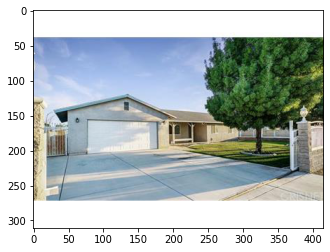

In [10]:
img = plt.imread('/content/drive/MyDrive/Houses Dataset/pics/pics/1300.jpg')
plt.imshow(img)

 # read csv data

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Houses Dataset/Copy of desc.csv')
data

,image_id,street,city,n_city,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
...,...,...,...,...,...,...,...,...
15469,15469,4156 Sterlingview Drive,"Moorpark, CA",227,5,4.1,4092,949000
15470,15470,4355 Avenida Prado,"Thousand Oaks, CA",372,5,3.0,2773,949900
15471,15471,12717 Koenigstein Rd Road,"Santa Paula, CA",338,3,2.0,1576,920000
15472,15472,36 Kunkle Street,"Oak View, CA",253,4,2.0,2086,997000


# data preprocessing

## drop street and city

In [12]:
data.drop(columns=['street','city', 'image_id'],inplace=True)
data

,n_city,bed,bath,sqft,price
0,317,3,2.0,1560,201900
1,48,3,2.0,713,228500
2,152,3,1.0,800,273950
3,48,3,1.0,1082,350000
4,55,4,3.0,2547,385100
...,...,...,...,...,...
15469,227,5,4.1,4092,949000
15470,372,5,3.0,2773,949900
15471,338,3,2.0,1576,920000
15472,253,4,2.0,2086,997000


## scale data


In [13]:
from sklearn.preprocessing import  RobustScaler
scaler = RobustScaler()
# data = pd.DataFrame(data=s_scaler.fit_transform(data.values),index=data.index)
data = pd.DataFrame(data=scaler.fit_transform(data.values),index=data.index)
data


,0,1,2,3,4
0,0.482143,0.0,-0.1,-0.298075,-1.120841
1,-0.890306,0.0,-0.1,-0.943777,-1.052632
2,-0.359694,0.0,-1.1,-0.877454,-0.936086
3,-0.890306,0.0,-1.1,-0.662474,-0.741073
4,-0.854592,1.0,0.9,0.454355,-0.651067
...,...,...,...,...,...
15469,0.022959,2.0,2.0,1.632171,0.794923
15470,0.762755,2.0,0.9,0.626644,0.797231
15471,0.589286,0.0,-0.1,-0.285878,0.720559
15472,0.155612,1.0,-0.1,0.102916,0.918008


## split X and Y

In [14]:
y = data[4].copy()
X = data.drop(columns=[4])


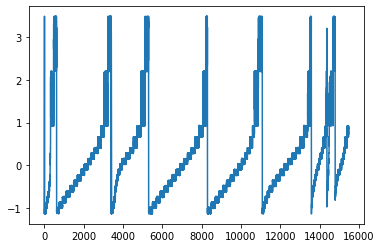

In [15]:
plt.plot(y)

## split test and train data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(12379, 4)

# fully connected model


In [17]:
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train,
          epochs=100,
          validation_data=(X_test,y_test),
          shuffle=True)

Epoch 1/100
387/387 [==============================] - 2s 5ms/step - loss: 0.6863 - accuracy: 0.0020 - val_loss: 0.6061 - val_accuracy: 0.0023
Epoch 2/100
387/387 [==============================] - 1s 4ms/step - loss: 0.6292 - accuracy: 0.0020 - val_loss: 0.5906 - val_accuracy: 0.0023
Epoch 3/100
387/387 [==============================] - 2s 4ms/step - loss: 0.6116 - accuracy: 0.0019 - val_loss: 0.5857 - val_accuracy: 0.0023
Epoch 4/100
387/387 [==============================] - 2s 4ms/step - loss: 0.6097 - accuracy: 0.0022 - val_loss: 0.5961 - val_accuracy: 0.0023
Epoch 5/100
387/387 [==============================] - 2s 4ms/step - loss: 0.6041 - accuracy: 0.0020 - val_loss: 0.5902 - val_accuracy: 0.0023
Epoch 6/100
387/387 [==============================] - 2s 4ms/step - loss: 0.6042 - accuracy: 0.0019 - val_loss: 0.5795 - val_accuracy: 0.0023
Epoch 7/100
387/387 [==============================] - 2s 4ms/step - loss: 0.6038 - accuracy: 0.0021 - val_loss: 0.5845 - val_accuracy: 0.0023

# get and resize images

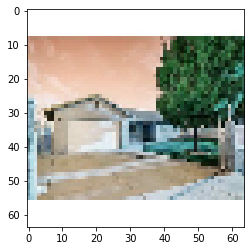

In [18]:
import cv2
sample=cv2.imread('/content/drive/MyDrive/Houses Dataset/pics/pics/1300.jpg')
plt.imshow(sample)
sample_resized=cv2.resize(sample,(64,64))
plt.imshow(sample_resized)


In [20]:
images = []
for i in range(15474):
  sample=cv2.imread('/content/drive/MyDrive/Houses Dataset/pics/pics/' + str(i) + '.jpg')
  sample_resized=cv2.resize(sample,(64,64))
  images.append(sample_resized)
  print(i)


Streaming output truncated to the last 5000 lines.
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
1

In [21]:
images = np.array(images)
images.shape

(15474, 64, 64, 3)

In [22]:
trainX = X[:13000]
trainy = y[:13000]
testX = X[13001:]
testY = y[13001:]
imagetrain = images[:13000]
imagetest = images[13001:]

# second model

In [23]:
input_model1 = Input((64, 64, 3),name = 'input1_layer')
input_model2 = Input((X_train.shape[1]),name = 'input2_layer')

#######################################################
#model1 CNN
model1 = Conv2D(32,(5,5), activation='relu',name = 'Conv1_1_5')(input_model1)
model1 = BatchNormalization(name = 'Bnorm1_1')(model1)
model1 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv1_2_5')(model1)
model1 = BatchNormalization(name = 'Bnorm1_2')(model1)
model1 = MaxPooling2D((2, 2),name = 'MaxPool1')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv1_3_3')(model1)
model1 = BatchNormalization(name = 'Bnorm1_3')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='valid',name = 'Conv1_4_3')(model1)
model1 = BatchNormalization(name = 'Bnorm1_4')(model1)
model1 = AveragePooling2D((2, 2),name = 'AvgPool1_1')(model1)
model1 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv1_5_1')(model1)
model1 = BatchNormalization(name = 'Bnorm1_5')(model1)
model1 = MaxPooling2D((2, 2),name = 'MaxPool1_2')(model1)
model1 = Flatten(name = 'Flatten1')(model1)
#######################################################
#model2 nn
model2 = Dense(units = 64, activation = 'relu')(input_model2)
model2 = Dropout(rate = 0.2)(model2)
model2 = Dense(units = 32, activation = 'relu')(model2)
model2 = Dense(units = 8, activation = 'relu')(model2)
#######################################################
merged = Concatenate()([model1, model2])
# neural network 
merged = Dense(units = 64, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 20, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 15, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
output = Dense(units = 1, activation = 'linear')(merged)

model = Model(inputs= [input_model1,input_model2], outputs=[output])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input1_layer (InputLayer)       [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_1_5 (Conv2D)              (None, 60, 60, 32)   2432        input1_layer[0][0]               
__________________________________________________________________________________________________
Bnorm1_1 (BatchNormalization)   (None, 60, 60, 32)   128         Conv1_1_5[0][0]                  
__________________________________________________________________________________________________
Conv1_2_5 (Conv2D)              (None, 60, 60, 32)   25632       Bnorm1_1[0][0]                   
_______________________________________________________________________________________

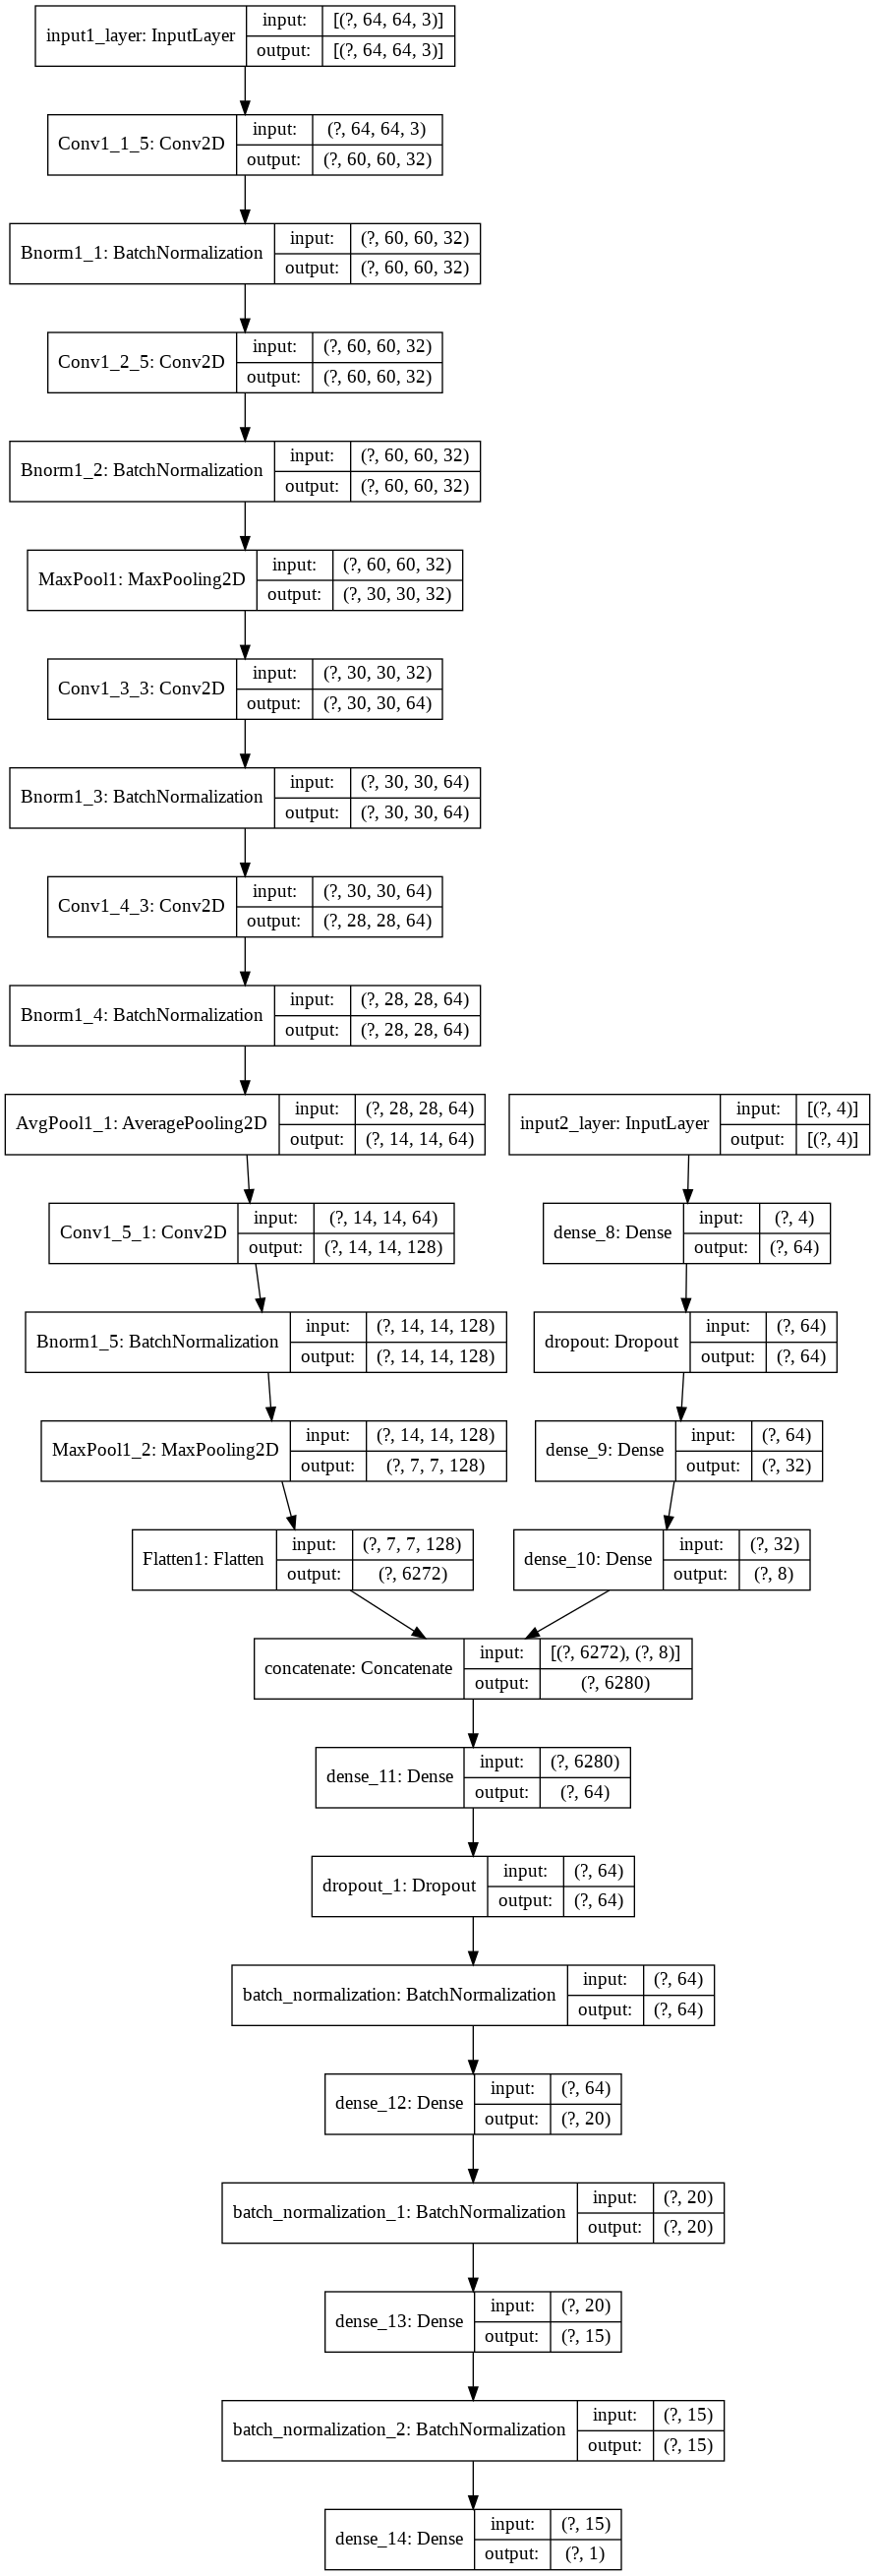

In [24]:
plot_model(model, show_shapes=True)

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x = [imagetrain,trainX], y = trainy,
                              batch_size = 256,
                              epochs= 20,
                              verbose=1,
                              validation_data=([imagetest, testX], testY)
                              )

Epoch 1/20
51/51 [==============================] - 5s 91ms/step - loss: 1.1237e-08 - accuracy: 0.0010 - val_loss: 6.3557e-08 - val_accuracy: 0.0020
Epoch 2/20
51/51 [==============================] - 4s 76ms/step - loss: 1.1237e-08 - accuracy: 0.0014 - val_loss: 6.3557e-08 - val_accuracy: 8.0873e-04
Epoch 3/20
51/51 [==============================] - 4s 77ms/step - loss: 1.1237e-08 - accuracy: 9.2308e-04 - val_loss: 6.3557e-08 - val_accuracy: 8.0873e-04
Epoch 4/20
51/51 [==============================] - 4s 77ms/step - loss: 1.1237e-08 - accuracy: 0.0012 - val_loss: 6.3557e-08 - val_accuracy: 0.0016
Epoch 5/20
51/51 [==============================] - 4s 77ms/step - loss: 1.1237e-08 - accuracy: 0.0015 - val_loss: 6.3557e-08 - val_accuracy: 0.0020
Epoch 6/20
51/51 [==============================] - 4s 77ms/step - loss: 1.1237e-08 - accuracy: 0.0013 - val_loss: 6.3557e-08 - val_accuracy: 0.0024
Epoch 7/20
51/51 [==============================] - 4s 77ms/step - loss: 1.1237e-08 - accuracy

In [27]:
model.save('/content/drive/MyDrive/Houses Dataset/model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Houses Dataset/model/assets
